In [255]:
import pandas as pd 
data = pd.read_csv('imdb_top_1000.csv')
data

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://m.media-amazon.com/images/M/MV5BNGEwMT...,Breakfast at Tiffany's,1961,A,115 min,"Comedy, Drama, Romance",7.6,A young New York socialite becomes interested ...,76.0,Blake Edwards,Audrey Hepburn,George Peppard,Patricia Neal,Buddy Ebsen,166544,NaN
996,https://m.media-amazon.com/images/M/MV5BODk3Yj...,Giant,1956,G,201 min,"Drama, Western",7.6,Sprawling epic covering the life of a Texas ca...,84.0,George Stevens,Elizabeth Taylor,Rock Hudson,James Dean,Carroll Baker,34075,NaN
997,https://m.media-amazon.com/images/M/MV5BM2U3Yz...,From Here to Eternity,1953,Passed,118 min,"Drama, Romance, War",7.6,"In Hawaii in 1941, a private is cruelly punish...",85.0,Fred Zinnemann,Burt Lancaster,Montgomery Clift,Deborah Kerr,Donna Reed,43374,"30,500,000"
998,https://m.media-amazon.com/images/M/MV5BZTBmMj...,Lifeboat,1944,NaN,97 min,"Drama, War",7.6,Several survivors of a torpedoed merchant ship...,78.0,Alfred Hitchcock,Tallulah Bankhead,John Hodiak,Walter Slezak,William Bendix,26471,NaN


In [256]:
data.isna().sum()

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [257]:
import numpy as np
data['Gross'] = data['Gross'].str.replace(',', '', regex=False)
data['Gross'] = data['Gross'].fillna('0')
data['Gross'] = data['Gross'].astype(int)
a=data['Gross'].ffill().bfill()
data['Gross']=data['Gross'].replace(0,np.nan)
data['Gross']=data['Gross'].ffill().bfill()
data['Gross'].value_counts()

Gross
4360000.0      9
336705.0       8
8000000.0      6
10000000.0     6
52709.0        5
              ..
305413918.0    1
66257002.0     1
1480006.0      1
22455976.0     1
1059830.0      1
Name: count, Length: 823, dtype: int64

In [258]:
# data.columns
data['Meta_score'].mean()
data['Meta_score'].value_counts()
# data['Meta_score'].unique()
data['Meta_score']=data['Meta_score'].ffill().bfill()
# data['Meta_score'].plot.box()

In [259]:

data['Certificate'] = data['Certificate'].fillna(data['Certificate'].mode()[0])


In [268]:
data.dtypes
# data['Released_Year']=data['Released_Year'].astype(int)
# data['Runtime']

Poster_Link       object
Series_Title      object
Released_Year      int32
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

1) Which directors appear most often in the top 1000?

<Axes: xlabel='Director'>

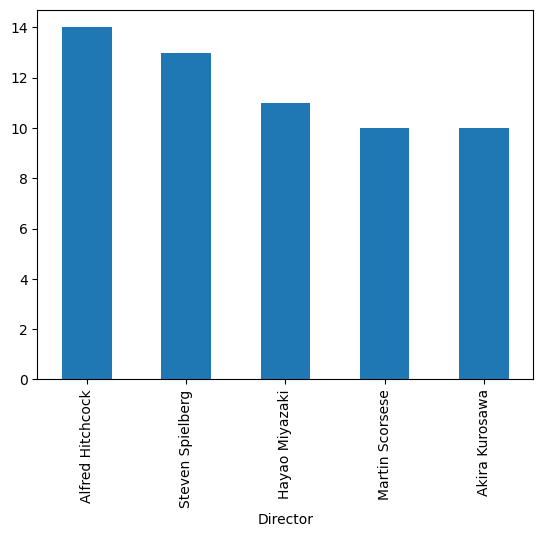

In [269]:
data.columns
data['Director']
data['Director'].unique()
data['Director'].value_counts()[0:5].plot.bar()


2) Which actors appear most frequently across top 1000?

<Axes: xlabel='Star1'>

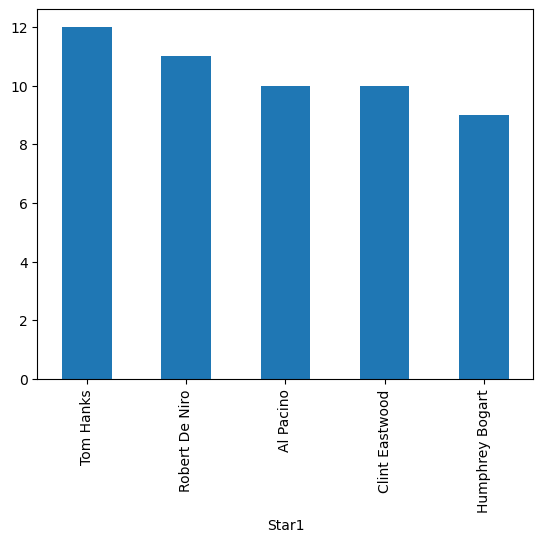

In [270]:
data.columns
data['Star1']
data['Star1'].unique()
data['Star1'].value_counts()[0:5].plot.bar()





3) How does IMDb rating correlate with number of votes or gross revenue?

The relation between IMDb rating and gross revenue is Extremely Weak(negligible).
In numbers 0.09
The relation between IMDb rating and No.of votes is Moderate Positive.
In numbers 0.49


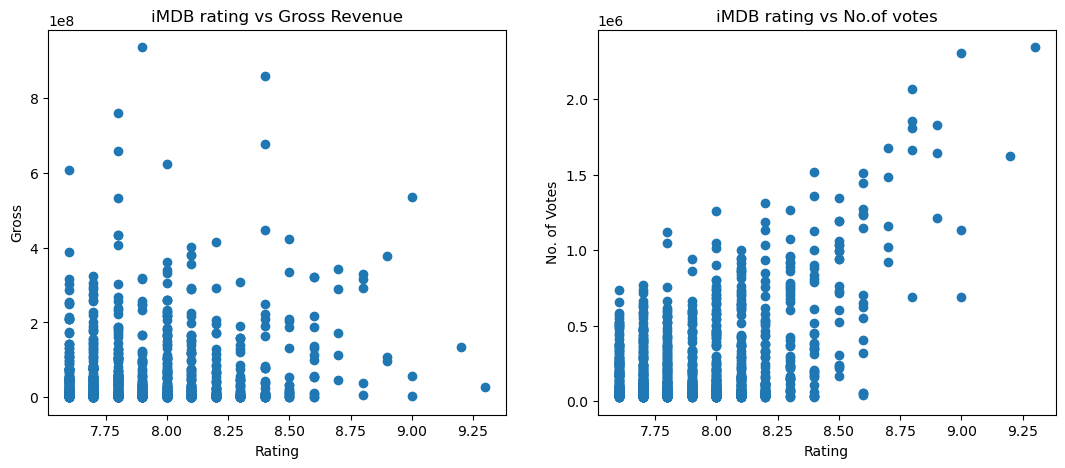

In [271]:
import matplotlib.pyplot as plt
data.columns
plt.figure(figsize=(13,5))
plt.subplot(1,2,1)
plt.scatter(data['IMDB_Rating'],data['Gross'])
plt.title('iMDB rating vs Gross Revenue')
plt.xlabel('Rating')
plt.ylabel('Gross')
corr=data['IMDB_Rating'].corr(data['Gross'])
print(f'The relation between IMDb rating and gross revenue is Extremely Weak(negligible).\nIn numbers {round(corr,2)}')
plt.subplot(1,2,2)
plt.scatter(data['IMDB_Rating'],data['No_of_Votes'])
plt.title('iMDB rating vs No.of votes')
plt.xlabel('Rating')
plt.ylabel('No. of Votes')
corr2=data['IMDB_Rating'].corr(data['No_of_Votes'])
corr2
print(f'The relation between IMDb rating and No.of votes is Moderate Positive.\nIn numbers {round(corr2,2)}')

4) Are newer movies rated better or worse than older ones?

In [320]:
import matplotlib.pyplot as plt
# data.columns
data['Released_Year'].unique()
# data['IMDB_Rating']
# data['Released_Year'].unique()
# data[data['Released_Year']=='PG']
# data.iloc[966,2] = '1995'
data['Released_Year'].min()
# data['Released_Year'].max()
# plt.hist(data['Released_Year'],bins='auto',edgecolor='black')
early = data[data['Released_Year'] < 1970]['IMDB_Rating'].mean()
latest =  data[data['Released_Year'] > 1970 ]['IMDB_Rating'].mean()
early
latest
print(f'There is a slight difference between their ratings the avg rating of movies before 1970 is {round(early,2)} and the avg rating of movies after 1970 is {round(latest,2)} ')

There is a slight difference between their ratings the avg rating of movies before 1970 is 8.01 and the avg rating of movies after 1970 is 7.93 
